In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv("../../data/raw/train_2.csv")
test = pd.read_csv("../../data/raw/test_2.csv")
train_x = train.drop(['SalePrice'], axis=1)
train_y = train['SalePrice']

In [3]:
# 行列の標準化
train_x = train_x.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
test = test.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [4]:
drop_columns = [
'Condition2_RRAe',
'Condition2_RRAn',
'Condition2_RRNn',
'Electrical_Mix',
'Exterior1st_ImStucc',
'Exterior1st_Stone',
'Exterior2nd_Other',
'Heating_Floor',
'Heating_OthW',
'HouseStyle_2.5Fin',
'MiscFeature_TenC',
'RoofMatl_Membran',
'RoofMatl_Metal',
'RoofMatl_Roll']
train_x = train_x.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [5]:
import  umap

# データは標準化などのスケールを揃える処理が行われているとする

# 学習データに基づいてUMAPに夜変換を定義
um = umap.UMAP(n_components=60)
um.fit(train_x)

# 変換の適用
feature_train = um.transform(train_x)

In [6]:
# 主成分得点
train_4 = pd.DataFrame(feature_train, columns=["PC{}".format(x + 1) for x in range(60)])

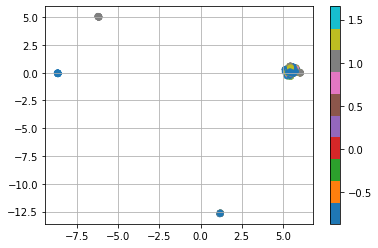

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 第一主成分と第二主成分でプロットする
plt.scatter(feature_train[:, 0], feature_train[:, 1], c=list(train_x.iloc[:, 0]),cmap=cm.tab10)
plt.grid()
plt.colorbar()
plt.show()
#     plt.savefig('umap.png')